<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 2-Pregunta 2 </H3>
<H3 align='center'> Jorge Nuñez-Diego Alvarez  </H3>
<hr style="height:2px;border:none"/>

#### 2.g _Grid search_ para SVM

Para terminar, comparemos el desempeño de los métodos lineales con un método no lineal, las SVM. Para esto buscaremos ajustar los hiperparámetros más relevantes del modelo, en este caso el parámetro `C` y `epsilon`, la penalización y el margen de holgura. Comente sobre la significancia de estos parámetros y su influencia sobre la máquina. Luego realice una busqueda en un mallado de estos parámetros, evaluando el _score_ (coeficiente de determinación) o MSE o ambos.

*Nota*: Entrenar una SVM toma mucho más tiempo que las regresiones lineales, por lo cual es recomendable probar primero su código en un número reducido de puntos y luego entrenar todos los modelos asegurandose de guardar bien los resultados. Si su maquina es muy lenta es incluso recomendable que esta parte la realice en _Collab_ de Google si desea explorar un número relevante de puntos. El mallado propuesto en el código es de referencia y puede elegirlo o construirlo como usted estime más conveniente. 

De todos los modelos entrenados, ¿Cuál es el mejor? ¿Cómo se compara el desempeño de este modelo con el mejor modelo lineal encontrado por usted? Adjunte gráficos que le parezcan relevantes. 

In [1]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse



In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

data['date'].head()

0    10544.0
1    13682.5
2    16699.0
3    13682.5
4    16276.0
Name: date, dtype: float64

In [4]:
data.drop(['id','zipcode'],axis=1,inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.5)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

scaler = StandardScaler().fit(data_pre_train)
data_train_scaled = pd.DataFrame(scaler.transform(data_pre_train),
                                 columns=data_pre_train.columns)

data_val_scaled = pd.DataFrame(scaler.transform(data_pre_val),
                                 columns=data_pre_val.columns)

data_test_scaled = pd.DataFrame(scaler.transform(data_pre_test),
                                 columns=data_pre_test.columns)

X_train_scaled = data_train_scaled
Y_t = X_train_scaled.pop('price')
Y_train_scaled = Y_t.values.reshape(-1,1)

X_val_scaled = data_val_scaled
Y_v = X_val_scaled.pop('price')
Y_val_scaled = Y_v.values.reshape(-1,1)

X_test_scaled = data_test_scaled
Y_tt = X_test_scaled.pop('price')
Y_test_scaled = Y_tt.values.reshape(-1,1)


In [6]:
# Generando mini_data de prueba 

data_pre_train2, data_pre_temp2 = train_test_split(data_pre_train, test_size= 0.9)
data_pre_val2, data_pre_test2 = train_test_split(data_pre_temp2, test_size= 0.4)

scaler = StandardScaler().fit(data_pre_train2)

data_train_scaled2 = pd.DataFrame(scaler.transform(data_pre_train2),
                                 columns=data_pre_train2.columns)

data_val_scaled2 = pd.DataFrame(scaler.transform(data_pre_val2),
                                 columns=data_pre_val2.columns)

data_test_scaled2 = pd.DataFrame(scaler.transform(data_pre_test2),
                                 columns=data_pre_test2.columns)

X_train_scaled2 = data_train_scaled2
Y_t2 = X_train_scaled2.pop('price')
Y_train_scaled2 = Y_t2.values.reshape(-1,1)

X_val_scaled2 = data_val_scaled2
Y_v2 = X_val_scaled2.pop('price')
Y_val_scaled2 = Y_v2.values.reshape(-1,1)

X_test_scaled2 = data_test_scaled2
Y_tt2 = X_test_scaled2.pop('price')
Y_test_scaled2 = Y_tt2.values.reshape(-1,1)

In [7]:
len(X_train_scaled)

10806


#### Importancia de los hiperparametros de las SVM `C` y `epsilon`.
**Epsilon :** El parametro $\epsilon$ se utiliza para relajar la condición de error en el modelo, el error que se contabiliza como `cero` si es menor a `epsilon` y para los casos en que el error sea mayor a `epsilon` este se contabiliza como $|y - f(x)| - \epsilon$.
<img src="epsilon.png">
La principal razón para elegir esta función $\L_\epsilon$ es la de permitir cierta dispersión en la función solución, de tal forma que todos los ejemplos que quedan confinados en esta región tubular ($\pm\epsilon$) no serán considerados vectores de soporte. De esta forma se reducirán significativamente el número de estos.

Dado que en la práctica es muy dificil que los ejemplos de entrenamiento se ajusten al modelo lineal con un error igual a cero, se recurre al concepto de margen blando, para esto se definen las variables de holgura, ${\xi_i}^+$ y ${\xi_i}^-$, las cuales permitirán cuantificar la magnitud del error. 

**C :** El parametro `C` en las SVM es el valor de penalización de la variable de holgura, para valores de `C` muy elevado el valor de $\xi$ se vuelve mas pequeño lo cual significa un modelo mas restrictivo.
Caso limite cuando: $C \to \infty \Longrightarrow {\xi_i} \to 0$, el cual corresponde al caso perfectamente lineal. Para valores de `C` bajos permite valores mas elevados de ${\xi_i}$, con lo cual se admite un mayor en el modelo. Caso limite cuando:$C \to 0 \Longrightarrow {\xi_i} \to \infty$, lo cual admitiria todos los ejemplos erroneos o ruidosos.
<img src="SVR.png">




>En base a lo antererior, se debe realizar una exploración de las distintas combinaciones de estos hiperparametros para encontrar un modelo que se ajuste bien a los datos y tenga buena capacidad de generalización lo cual se realizara a continuación.





In [8]:
Cs, epsilons = pd.np.meshgrid([i for i in range(1,41)],[i/20 for i in range(1,11)])
Error_val = np.zeros((10,40 ))
Error_train = np.zeros((10,40))
Scor = np.zeros((10,40))
er = 100
coef_mse = [0,0]

for  C, epsilon in zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1))):
    b= epsilon*20 -1
    i = int(b[0])
    j = int(C[0]-1)
    sv = SVR(C=C, epsilon=epsilon)
    sv.fit(X_train_scaled, Y_train_scaled)
    y_predict_val = sv.predict(X_val_scaled)
    y_predict_train = sv.predict(X_train_scaled)
    mse_val =mse(Y_val_scaled, y_predict_val)
    mse_train =mse(Y_train_scaled, y_predict_train)
    Error_val[i,j] = mse_val
    Error_train[i,j] = mse_train
    if mse_val <= er:
        coef_mse[0] = int(C[0])
        coef_mse[1] = float(epsilon[0])
        er = mse_val

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

In [9]:
coef_mse

[5, 0.15]

**Comentario:** Como se busca un modelo con buena capacidad de generalización, nos quedaremos con el modelo que presente menor error de validación, se obtiene cuando `C = 4` y $\epsilon$ = 0.1.

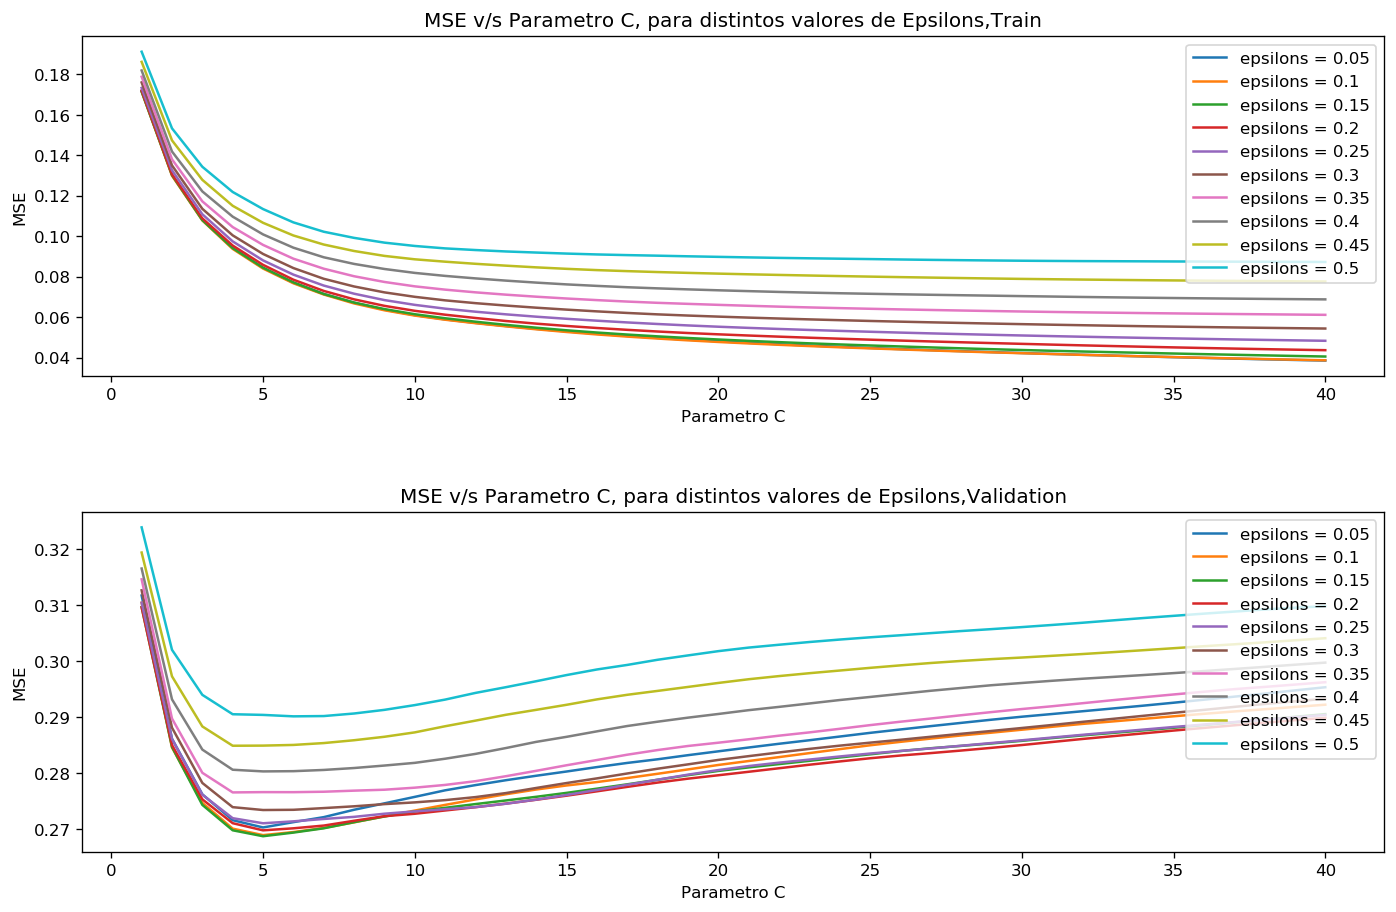

In [10]:
eps = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
rango = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
x = rango 
plt.figure(figsize=(14,9), dpi=120)

plt.subplot(2,1,1)
for i in range(len(eps)):
    y= Error_train[i,:]
    plt.plot(x,y,label = 'epsilons = '+str(eps[i]))
    plt.legend(loc='upper right')
plt.xlabel('Parametro C')
plt.ylabel('MSE')
plt.title('MSE v/s Parametro C, para distintos valores de Epsilons,Train')

plt.subplot(2,1,2)
for i in range(len(eps)):
    y= Error_val[i,:]
    plt.plot(x,y,label = 'epsilons = '+str(eps[i]))
    plt.legend(loc='upper right')
plt.xlabel('Parametro C')
plt.ylabel('MSE')
plt.title('MSE v/s Parametro C, para distintos valores de Epsilons,Validation')

plt.subplots_adjust( hspace=0.4)
                    

plt.show()


**Comentario:** En los gráficos de Train y Validación se puede corroborar la influencia de los hiperparametros en el modelo. En el gráfico de `Train` se observa claramente que a medida que aumenta `C` y valores bajos de `epsilon` , el error de Train disminuye. Del gráfico de `Validación` se observa una notoria disminución del error a medida que aumenta `C`, pero para valores de `C` ya mayores a 4 el error de `Validación` comienza a aumentar, lo cual implica que se esta produciendo el fenómeno de `overfitting`. En base a esto podriamos concluir que el mejor modelo se obtiene para `C = 4 y epsilon = 0.1`. 

#### A continuación graficaremos el MSE de train y validación para C = 4 y epsilons = 0.1.

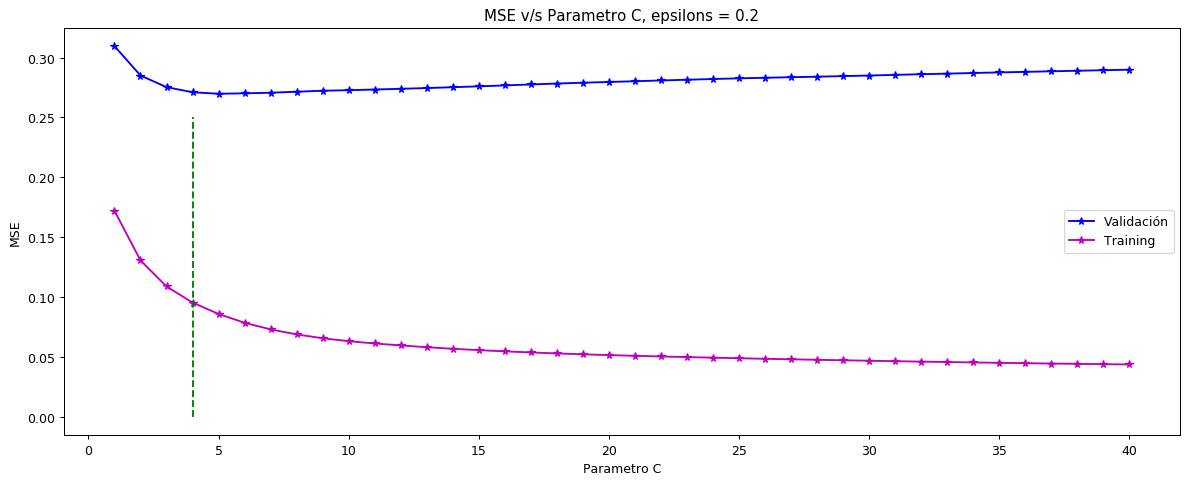

In [11]:
x = rango
y_val= Error_val[3,:]
y_train = Error_train[3,:]
y = [0,0.05,0.1,0.15,0.2,0.25]
xx = [4,4,4,4,4,4]
plt.figure(figsize=(16,6), dpi=90)
plt.plot(x,y_val,'*-b',label = 'Validación') 
plt.plot(x,y_train,'*-m',label = 'Training')
plt.plot(xx,y,'--g')
plt.legend(loc='center right')
plt.xlabel('Parametro C')
plt.ylabel('MSE')
plt.title('MSE v/s Parametro C, epsilons = 0.2')
plt.show()

**Coemntario :** SE observa del gráfico que para valores de `C` mayores a 4 el modelo comienza a sobreajustarse debido a que disminuye su error en el train y aumenta el error de validación produciendose así el fenómeno de overfitting. el cual implica poca capacidad de generalización del modelo, cabe destacar que aun asi se obtiene un mejor desempeño que los modelos de regresión lineal simple.

In [12]:
Cs, epsilons = pd.np.meshgrid([i for i in range(1,11)],[i/20 for i in range(1,11)])
Error_val = np.zeros((10,10 ))
Error_train = np.zeros((10,10))
Scor = np.zeros((10,10))
er = 100
coef_mse = [0,0]

for  C, epsilon in zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1))):
    b= epsilon*20 -1
    i = int(b[0])
    j = int(C[0]-1)
    sv = SVR(C=C, epsilon=epsilon, kernel='linear')
    sv.fit(X_train_scaled2, Y_train_scaled2)
    y_predict_val = sv.predict(X_val_scaled2)
    y_predict_train = sv.predict(X_train_scaled2)
    mse_val =mse(Y_val_scaled2, y_predict_val)
    mse_train =mse(Y_train_scaled2, y_predict_train)
    Error_val[i,j] = mse_val
    Error_train[i,j] = mse_train
    if mse_val <= er:
        coef_mse[0] = int(C[0])
        coef_mse[1] = float(epsilon[0])
        er = mse_val

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lenovo/.conda/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A 

In [13]:
# kernel lineal

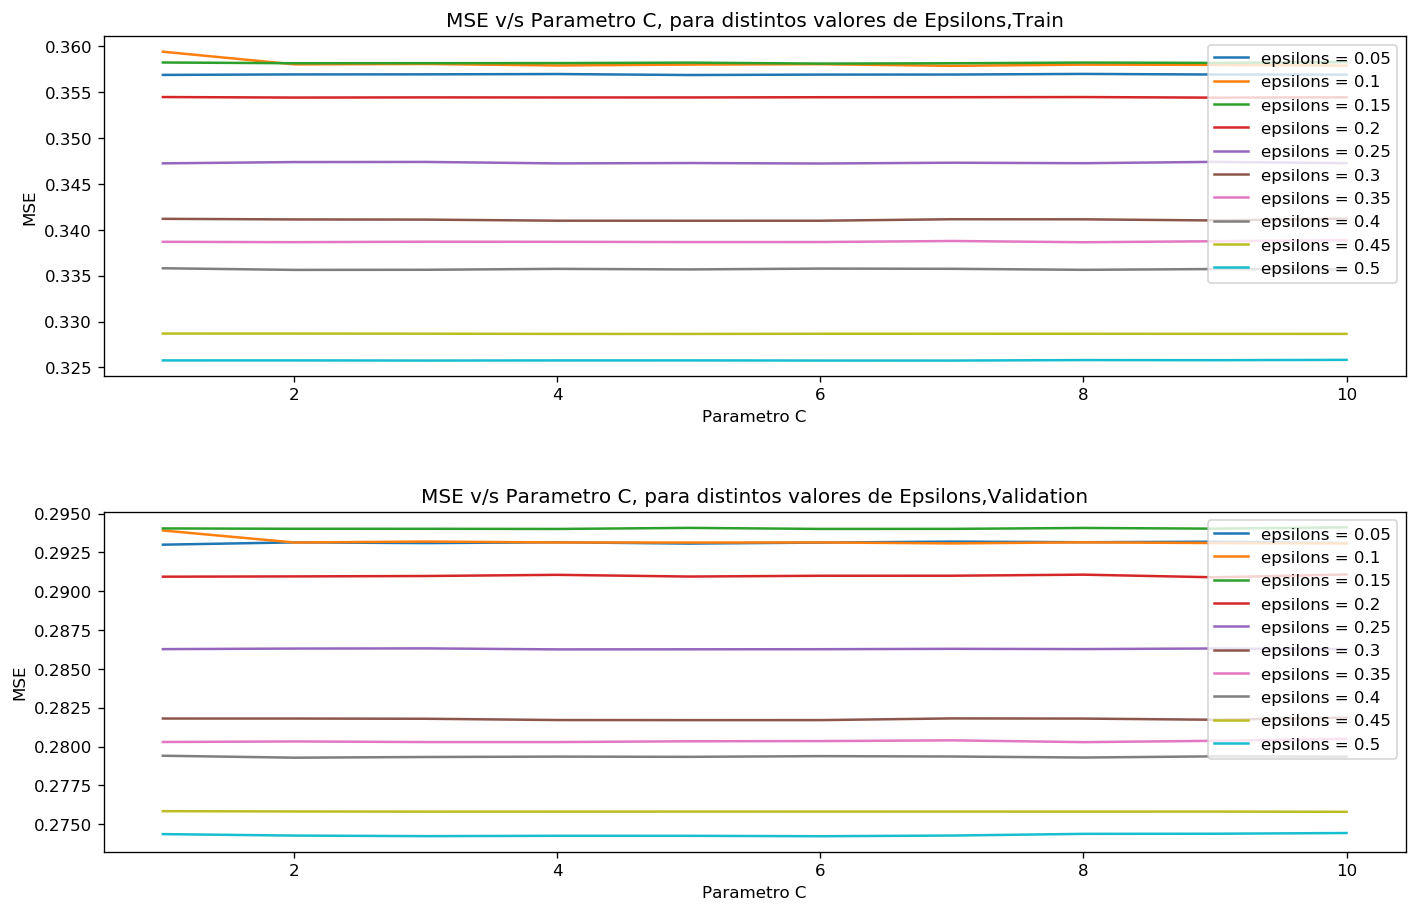

In [14]:
eps = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
rango = [1,2,3,4,5,6,7,8,9,10]
x = rango 
plt.figure(figsize=(14,9), dpi=120)

plt.subplot(2,1,1)
for i in range(len(eps)):
    y= Error_train[i,:]
    plt.plot(x,y,label = 'epsilons = '+str(eps[i]))
    plt.legend(loc='upper right')
plt.xlabel('Parametro C')
plt.ylabel('MSE')
plt.title('MSE v/s Parametro C, para distintos valores de Epsilons,Train')

plt.subplot(2,1,2)
for i in range(len(eps)):
    y= Error_val[i,:]
    plt.plot(x,y,label = 'epsilons = '+str(eps[i]))
    plt.legend(loc='upper right')
plt.xlabel('Parametro C')
plt.ylabel('MSE')
plt.title('MSE v/s Parametro C, para distintos valores de Epsilons,Validation')

plt.subplots_adjust( hspace=0.4)
                    

plt.show()


**comentario :** Se cambia el kernel de la SVM por uno lineal y se observa que se optiene un desempeño menor que para un kernel RBF, con lo cual podriamos concluir que la data presenta un comportamineto no lineal.